# 5章 サポートベクトルマシーン
## 環境構築

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 問題5.8

In [3]:
#irisデータセットを使って、SetosaとVersicolorに線形分類する
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #petal length, petal width
y = iris["target"]

setosa_or_versi = (y == 0) | (y == 1)
X = X[setosa_or_versi]
y = y[setosa_or_versi]

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

#ハイパーパラメータ設定(ハードとソフトのバランス)
C = 5
#正則化の係数
alpha = 1 / (C * len(X))
#3つのモデルを設定
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3,random_state=42)
#スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("COMPARISON of vector w")
print("LinearSVC: ", lin_clf.intercept_, lin_clf.coef_)
print("SVC: ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}): ".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)


COMPARISON of vector w
LinearSVC:  [0.28475098] [[1.05364854 1.09903804]]
SVC:  [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200):  [0.117] [[0.77714169 0.72981762]]


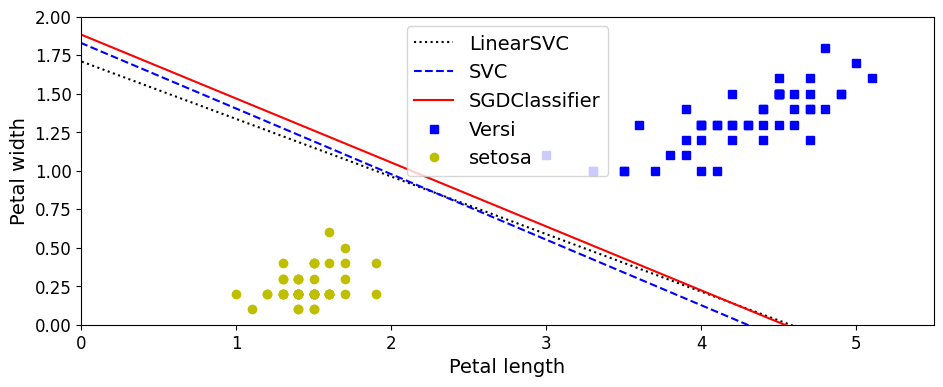

In [5]:
#plot the results
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0,1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0,1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0,1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0,1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0,1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0,1]

#scaleを戻す
line1 = scaler.inverse_transform([[-10, -10*w1 + b1], [10, 10*w1+b1]])
line2 = scaler.inverse_transform([[-10, -10*w2 + b2], [10, 10*w2+b2]])
line3 = scaler.inverse_transform([[-10, -10*w3 + b3], [10, 10*w3+b3]])

#plot all of them
plt.figure(figsize = (11, 4))
plt.plot(line1[:,0], line1[:,1], "k:", label = "LinearSVC")
plt.plot(line2[:,0], line2[:,1], "b--", label = "SVC")
plt.plot(line3[:,0], line3[:,1], "r-", label = "SGDClassifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label = "Versi")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# 問題5.9

In [6]:
#dataをとってくる
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:6000]
y_train = y[:6000]
X_test = X[6000:]
y_test = y[6000:]

In [7]:
#線形SVMの学習
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train,  y_train)


/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train ,y_pred)

0.9981666666666666

In [9]:
#スケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [10]:
#線形SVMの学習
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled,  y_train)

/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [11]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train ,y_pred)

0.9983333333333333

In [12]:
#SVCでカーネルを使う
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train ,y_pred)

In [ ]:
#ハイパーパラメータの調整
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2. cv=3)
rnd_serach_cv.fit(X_train_scaled, y_train)

In [ ]:
#テストインスタンスで試す
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, t_pred)

# 問題5.10
カリフォルニアの住宅価格でSVM回帰

In [13]:
from sklearn.datasets import fetch_california_housing

housing =   fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#スケーリング
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
#学習
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Users/abetoshinin/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_pred, y_train)
np.sqrt(mse)

0.9819256687727764

In [21]:
#RBFカーネルを使う
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
#ハイパーパラメータのチューニング
param_distributions = {"gamma" : reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  21.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  48.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  47.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  49.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  29.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  20.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  24.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  28.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  30.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  26.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  25.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399

In [ ]:
#得られたパラメータで訓練MSE
print(rnd_search_cv.best_estimator_)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print(np.sqrt(mse))

In [ ]:
#得られたパラメータでテストMSE
print(rnd_search_cv.best_estimator_)
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))